# King County Real Estate Project

## Business Understanding

For this project, I have been approached by the leadership of a new startup online real estate data analytics firm, Beatum Cheatum and Fleecum ('BCF'). BCF has tasked me with providing advice to one of its new clients, a small well established local real estate broker from the King County region, in the Ballard neighborhood of the city ('Client'). Client has a large crew of seasoned real estate agents, loan officers, lead generation experts, and other sales supply chain specialists.  Client is exploring ideas to scale its business in the King County region and keep pace with newer, more technologically advanced companies, and wants to obtain better insights by leveraging the abundance of real estate data available.  Toward this end, Client has approached BCF for a more analytical and scientific perpective on what drives residential real estate sales in King County so that it can provide actionable reference points for its relentless 'direct to consumer' sales team.  In particular, Client has heard of 'machine learning' and would love to be able to explain, in layperson terms, how its actionable data is generated from 'machine learning' techniques.  Admittedly, Client is not 'tech savy' and wants any such explaination to be understandable for even the most technologically challenged 'old school' members of its team.  

After back and forth discussion, BCF was retained to provide Client with a multivariate regression analysis of the King County real estate market, with `price` being the primary dependent variable.  


![Johnny discovers the internet](https://youtube.com/clip/Ugkx63KFvnginGMoSA6LueWTxb0a4E6bvkQz)

## Data Understanding


Data for this analysis was taken from three different datasets.  The intitial 'given' data provided by BCF is a messy King County dataset with information scraped from the [King County Assessor's website](https://data.kingcounty.gov/Property-Assessments/Assessor-Localscape-Portal/2e9i-fa8a) ('Baseline Model Data'). The second dataset was scraped from [ZipDataMaps](https://www.zipdatamaps.com/king-wa-county-zipcodes) ('Zipcode data'). The third and final dataset was taken from the [King County GIS Open Data Site](https://data.kingcounty.gov/County-Operations/King-County-GIS-Open-Data-site/wuuf-xywg) and includes a range of factors that provide information for the final model.

The initial baseline regression model was built utilizing the base dataset. The second model iteration was built using the

-what each record represents
-which column is begin used as the regress

## Data Preparation

### Loading the Data

In [1]:

#importing all appropriate Pythonic libraries and packages 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import re
%matplotlib inline

ImportError: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "/Users/chuck/opt/anaconda3/envs/learn-env/bin/python"
  * The NumPy version is: "1.21.5"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: dlopen(/Users/chuck/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so, 0x0002): Library not loaded: '@rpath/libopenblas.dylib'
  Referenced from: '/Users/chuck/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/core/_multiarray_umath.cpython-38-darwin.so'
  Reason: tried: '/Users/chuck/opt/anaconda3/envs/learn-env/lib/libopenblas.dylib' (no such file), '/Users/chuck/opt/anaconda3/envs/learn-env/lib/libopenblas.dylib' (no such file), '/Users/chuck/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/core/../../../../libopenblas.dylib' (no such file), '/Users/chuck/opt/anaconda3/envs/learn-env/lib/libopenblas.dylib' (no such file), '/Users/chuck/opt/anaconda3/envs/learn-env/lib/libopenblas.dylib' (no such file), '/Users/chuck/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/core/../../../../libopenblas.dylib' (no such file), '/Users/chuck/opt/anaconda3/envs/learn-env/lib/libopenblas.dylib' (no such file), '/Users/chuck/opt/anaconda3/envs/learn-env/bin/../lib/libopenblas.dylib' (no such file), '/Users/chuck/opt/anaconda3/envs/learn-env/lib/libopenblas.dylib' (no such file), '/Users/chuck/opt/anaconda3/envs/learn-env/bin/../lib/libopenblas.dylib' (no such file), '/usr/local/lib/libopenblas.dylib' (no such file), '/usr/lib/libopenblas.dylib' (no such file)


 # section_1

[section_3](#section_3)
[section_2](#section_2)

In [100]:
# reading in the King County dataset to Pandas
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [102]:
# dropping the placeholder column
df.drop(labels='id', axis=1, inplace=True)

In [103]:
# converting all dates to datetime
df['date'] = pd.to_datetime(df['date'])

In [104]:
# isolating the zip code 
# alternative methods to achieve same
# df['Zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
# df['address'][0].split(',')[2][-5:]
# df['address'][1000][-20:-15]

In [105]:
df['Zipcode'] = df['address'].apply(lambda x: x[-20:-15])

In [106]:
df['Zipcode'] = df['Zipcode'].astype(int)

<AxesSubplot:>

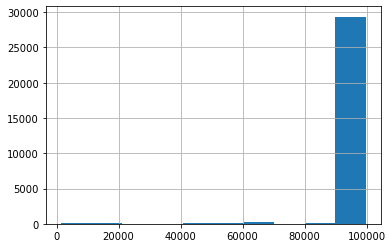

In [107]:
df['Zipcode'].hist()

In [108]:
# controling for outliers
df = df.loc[(df['Zipcode'] > 98000) & (df['Zipcode'] <= 98922)]

In [109]:
# reading in Zip/Neighborhood/Population dataset
df_zip = pd.read_csv('data/kc_zipcode_details.csv', index_col=0)
df_zip.tail(55)

,Neighborhood,Population
ZIP Code,,
98158,Seattle,NaN
98161,Seattle,NaN
98164,Seattle,141.0
98166,Seattle,20301.0
98168,Seattle,33734.0
98174,Seattle,NaN
98177,Seattle,19030.0
98178,Seattle,24092.0
98188,Seattle,23111.0


In [110]:
df.Zipcode.nunique()

88

In [111]:
# changing index name to match other dataset
df_zip.index.names = ['Zipcode']

In [112]:
df_zip.reset_index(inplace=True)
df_zip.head()

,Zipcode,Neighborhood,Population
0,98001,Auburn,31911.0
1,98002,Auburn,31647.0
2,98003,Federal Way,44151.0
3,98004,Bellevue,27946.0
4,98005,Bellevue,17714.0


<AxesSubplot:>

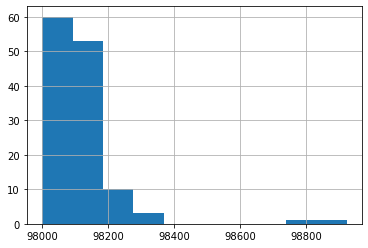

In [113]:
# Outliers
df_zip['Zipcode'].hist()

In [114]:
# # controlling for outliers
# df_zip = df_zip.loc[(df_zip['Zipcode'] > 98000) & (df_zip['Zipcode'] <= 98288)]

In [115]:
df_zip.nunique()

Zipcode         128
Neighborhood     38
Population       85
dtype: int64

In [116]:
df_zip['Zipcode'].nunique()

128

### Renaming Selldate

In [117]:
# renaming date to selldate
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate, inplace=True)

## Engineering Yr_Old

In [118]:
# creating a year old column
df['yr_old'] = np.where(df['yr_renovated'] !=0,df.selldate.apply(lambda x: x.year) - df['yr_renovated'],
                        df['selldate'].apply(lambda x: x.year) - df['yr_built'])

In [119]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,Zipcode,yr_old
count,2.924100e+04,29241.000000,29241.000000,29241.000000,2.924100e+04,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000,29241.000000
mean,1.112620e+06,3.435040,2.332239,2130.756643,1.719192e+04,1.517151,1825.820423,480.763654,336.275811,216.363599,1973.878458,93.764304,47.543109,-122.214209,98077.684826,44.741698
std,8.953389e+05,0.978861,0.895780,977.344954,6.125879e+04,0.548585,880.729276,585.935636,286.199465,246.749571,31.684861,422.616958,0.147563,0.143653,55.267033,31.007476
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.636797,-122.666021,98001.000000,-1.000000
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.430065,-122.328290,98032.000000,18.000000
50%,8.670000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,142.000000,1976.000000,0.000000,47.557680,-122.234070,98059.000000,43.000000
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.078000e+04,2.000000,2290.000000,960.000000,510.000000,310.000000,2001.000000,0.000000,47.672045,-122.127475,98117.000000,66.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960,98663.000000,122.000000


In [120]:
# controlling for dates where house was sold after renovation
df.loc[df['yr_old'] < 0, 'yr_old'] = 0

In [121]:
df.yr_old.value_counts()

0      1368
1       664
44      504
54      478
16      468
       ... 
89       32
87       31
119      30
88       30
120      27
Name: yr_old, Length: 123, dtype: int64

### Data Cleaning

In [122]:
# identifying missing values 
df.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001026
sewer_system     0.000445
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
dtype: float64

In [123]:
# remove missing values in columns
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

In [124]:
# identify missing values in zip code data
df_zip.isna().sum()/df.shape[0]

Zipcode         0.000000
Neighborhood    0.000000
Population      0.001438
dtype: float64

In [125]:
df_zip.dropna(subset=['Population'], axis=0, inplace=True)

## Merge on zipcode to include neighborhood/population
# section_2

[section_1](#section_1)
[section_3](#section_3)   

In [126]:
df1 = df.merge(df_zip, how='left', on='Zipcode')

In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 29199
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  int64         
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  int64         
 5   sqft_lot       29200 non-null  int64         
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

In [128]:
# identify missing data in new dataset
df1.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.000000
sewer_system     0.000000
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
Zipcode          0.000000
yr_old           0.000000
Neighborhood     0.000856
Population       0.000856
dtype: float64

In [129]:
df1.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29175 entries, 0 to 29199
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29175 non-null  datetime64[ns]
 1   price          29175 non-null  float64       
 2   bedrooms       29175 non-null  int64         
 3   bathrooms      29175 non-null  float64       
 4   sqft_living    29175 non-null  int64         
 5   sqft_lot       29175 non-null  int64         
 6   floors         29175 non-null  float64       
 7   waterfront     29175 non-null  object        
 8   greenbelt      29175 non-null  object        
 9   nuisance       29175 non-null  object        
 10  view           29175 non-null  object        
 11  condition      29175 non-null  object        
 12  grade          29175 non-null  object        
 13  heat_source    29175 non-null  object        
 14  sewer_system   29175 non-null  object        
 15  sqft_above     2917

In [131]:
# no NA/missing values in merged dataset
df1.isna().sum()/df1.shape[0]

selldate         0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
greenbelt        0.0
nuisance         0.0
view             0.0
condition        0.0
grade            0.0
heat_source      0.0
sewer_system     0.0
sqft_above       0.0
sqft_basement    0.0
sqft_garage      0.0
sqft_patio       0.0
yr_built         0.0
yr_renovated     0.0
address          0.0
lat              0.0
long             0.0
Zipcode          0.0
yr_old           0.0
Neighborhood     0.0
Population       0.0
dtype: float64

## Protected

The code below was a failed attempt to establish a protected/unprotected feature that would include only homes contained in a greenbelt that likely had some watershed/wildlife/environmental nuisance protection.  It was not correlated with price, nor large enough to be a predictor.  

In [132]:
# df1.loc[(df1['nuisance'] == 'YES') & (df1['greenbelt'] == 'YES'), 'protected'] = 'protected'
# df1.loc[(df1['nuisance'] != 'YES') | (df1['greenbelt'] != 'YES'), 'protected'] = 'unprotected'

In [133]:
# df1['protected']

In [134]:
# df1['protected'].value_counts() 

HomeSales 
standard scaling allows you to find coefficients. 
Be sure to include metric - r squared - to describe overall model performance.  
collineriety 
log scalling
remove outliers.  
Increase r squared. 


1. run model
2. see improvements, clean/feature engineer.  
3. see coefficients becoming more accurate.


## Target distribution

In [135]:
df1.corr()['price']

price            1.000000
bedrooms         0.290838
bathrooms        0.487932
sqft_living      0.616666
sqft_lot         0.086788
floors           0.199866
sqft_above       0.546010
sqft_basement    0.246373
sqft_garage      0.267238
sqft_patio       0.317644
yr_built         0.105905
yr_renovated     0.085546
lat              0.297701
long             0.081589
Zipcode         -0.106057
yr_old          -0.138005
Population      -0.111565
Name: price, dtype: float64

`sqft_living` is the most highly correlated feature in the baseline numeric model.  

Price is the singular dependent variable in our model.  

## Modeling

In [136]:
# Creating categorical variables
cats = df1[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Neighborhood', 'grade']]
cats1 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood', 'grade']]

### Baseline Model

In [137]:
pred_cols = [x for x in df1.columns if x not in cats1]

In [138]:
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'yr_old',
 'Population']

In [139]:
# create baseline model
preds = df1[pred_cols]
target = df1['price']

In [140]:
y = target
X = preds
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [141]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     1837.
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:04:39   Log-Likelihood:            -4.3154e+05
No. Observations:               29175   AIC:                         8.631e+05
Df Residuals:                   29159   BIC:                         8.633e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.986e+07   4.33e+06    -23.040      0.000   -1.08e+08   -9.14e+07
bedrooms      -1.352e+05   5206.837    -25.965      0.000   -1.45e+05   -1.25e+05
bathrooms      1.169e+05   7690.091     15.206      0.000    1.02e+05    1.32e+05
sqft_living     327.6509     17.226     19.020      0.000     293.886     361.416
sqft_lot          0.1726      0.064      2.683      0.007       0.046       0.299
floors        -9.947e+04   9789.703    -10.161      0.000   -1.19e+05   -8.03e+04
sqft_above      291.6558     17.598     16.573      0.000     257.163     326.148
sqft_basement    77.9615     13.081      5.960      0.000      52.322     103.601
sqft_garage     -18.6810     18.413     -1.015      0.310     -54.772      17.410
sqft_patio      256.8007     17.050     15.062      0.000     223.382     290.219
yr_built       2737.4296    726.443      3.768      0.000    1313.569    4161.290
yr_renovated    201.2677     22.971      8.762      0.000     156.243     246.292
lat            1.561e+06   2.72e+04     57.399      0.000    1.51e+06    1.61e+06
long          -1.655e+05    3.2e+04     -5.172      0.000   -2.28e+05   -1.03e+05
yr_old         4817.6011    730.511      6.595      0.000    3385.767    6249.435
Population       -2.5603      0.350     -7.316      0.000      -3.246      -1.874
==============================================================================
Omnibus:                    45339.400   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         78876428.635
Skew:                           9.425   Prob(JB):                         0.00
Kurtosis:                     257.028   Cond. No.                     7.35e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
baseline_mae = mean_absolute_error(y, results.predict(sm.add_constant(X)))
baseline_mae

338346.69291785813

This baseline model is limited to both discrete and continuous numeric predictors.  

Based on the Mean Absolute Error ('MAE'), overall this baseline model is off by about an average of $338,488.68 for any given prediction. This calculation is the mean absolute (regardless of whether it is positve or negative) distance of all errors.   

The intercept is extremely negative, at minus 9 to the 7th power.  

The coefficient for `sqft_living` tells us that for each increase of square foot living space, we see an associated increase in saleprice of about $327.83 dollars.  

## Improving upon the baseline

## Grade - a failed attempt at making an Ordinal category numeric

In [143]:
# df1.grade.value_counts()

In [144]:
# df1.grade.value_counts()

In [145]:
# # grade_map = {
#     "7 Average": 7,
#     "8 Good": 8,
#     "9 Better": 9,
#     "6 Low Average": 6,
#     "5 Fair": 5,
#     "4 Low": 4,
#     "3 Poor": 3,
#     "2 Substandard": 2,
#     "10 Very Good": 10,
#     "11 Excellent": 11,
#     "13 Mansion": 13,
#     "12 Luxury": 12,
# }

In [146]:
# df1.grade = df1.grade.map(grade_map)

In [147]:
# making results more model friendly 
# dum_df1.loc[dum_df1['grade'] == '2 Substandard', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '3 Poor', 'grade'] = 1
# dum_df1.loc[dum_df1['grade'] == '4 Low', 'grade'] = 1

# dum_df1.loc[dum_df1['grade'] == '5 Fair', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '6 Low Average', 'grade'] = 2
# dum_df1.loc[dum_df1['grade'] == '7 Average', 'grade'] = 2

# dum_df1.loc[dum_df1['grade'] == '8 Good', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '9 Better', 'grade'] = 3
# dum_df1.loc[dum_df1['grade'] == '10 Very Good', 'grade'] = 3

# dum_df1.loc[dum_df1['grade'] == '11 Excellent', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '12 Luxury', 'grade'] = 4
# dum_df1.loc[dum_df1['grade'] == '13 Mansion', 'grade'] = 4

The above code, which was not used, was a brief lesson in why you do not want to force ordinal categories into continuous numeric variables, unless the values are in fact multiples of each other.    

## Lesson

scatter plot: visualize relationship  

box plot: gives you quantile info

histograms: distribution of frequencies 

qq plot residuals (outside of range) is 

In [148]:
# plt.boxplot(df1.price)

In [149]:
# sns.heatmap(X.corr())

## Discrete numeric predictors 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

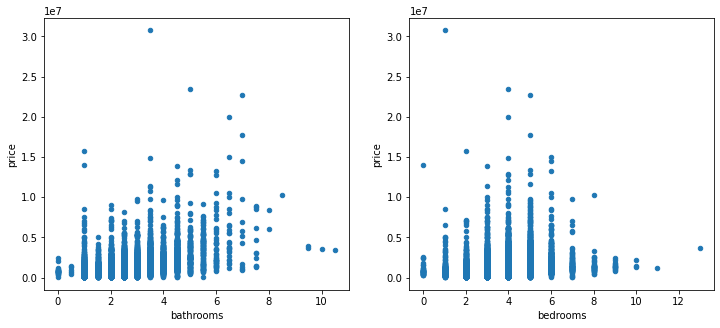

In [150]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='bathrooms', y='price', ax=ax1)
df1.plot.scatter(x='bedrooms', y='price', ax=ax2)

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

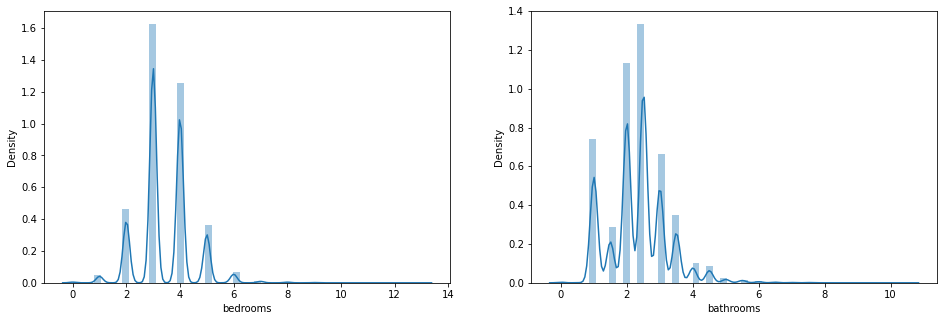

In [151]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['bedrooms'])
plt.subplot(1,2,2)
sns.distplot(df1['bathrooms'])

In [152]:
upper_limit = df1['bedrooms'].mean() + 3*df1['bedrooms'].std()
lower_limit = df1['bedrooms'].mean() - 3*df1['bedrooms'].std()
df1['bedrooms'] = np.where(df1['bedrooms'] > upper_limit, upper_limit,
np.where(df1['bedrooms'] < lower_limit, lower_limit, df1['bedrooms']))

In [153]:
upper_limit = df1['bathrooms'].mean() + 3*df1['bathrooms'].std()
lower_limit = df1['bathrooms'].mean() - 3*df1['bathrooms'].std()

df1['bathrooms'] = np.where(df1['bathrooms'] > upper_limit, upper_limit,
    np.where(df1['bathrooms'] < lower_limit, lower_limit, df1['bathrooms']))

<AxesSubplot:xlabel='floors', ylabel='price'>

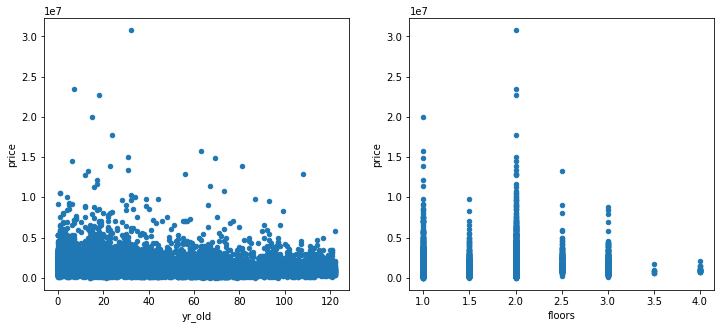

In [154]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='yr_old', y='price', ax=ax1)
df1.plot.scatter(x='floors', y='price', ax=ax2)

In [155]:
upper_limit = df1['yr_old'].mean() + 3*df1['yr_old'].std()
lower_limit = df1['yr_old'].mean() - 3*df1['yr_old'].std()
df1['yr_old'] = np.where(df1['yr_old'] > upper_limit, upper_limit,
np.where(df1['yr_old'] < lower_limit, lower_limit, df1['yr_old']))

In [156]:
upper_limit = df1['floors'].mean() + 3*df1['floors'].std()
lower_limit = df1['floors'].mean() - 3*df1['floors'].std()
df1['floors'] = np.where(df1['floors'] > upper_limit, upper_limit,
np.where(df1['floors'] < lower_limit, lower_limit, df1['floors']))

<AxesSubplot:xlabel='floors', ylabel='Density'>

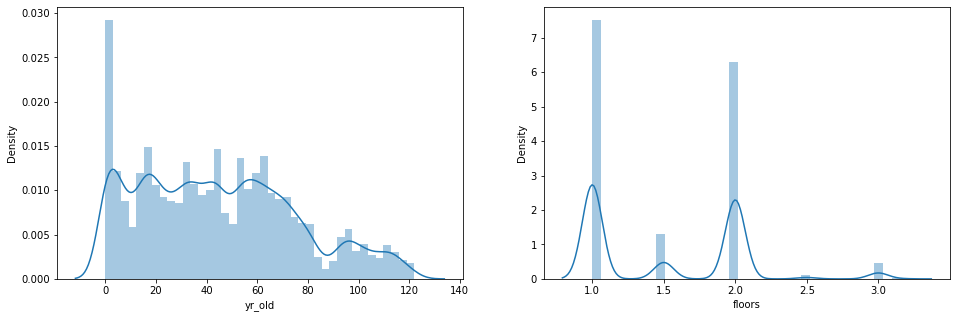

In [157]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['yr_old'])
plt.subplot(1,2,2)
sns.distplot(df1['floors'])

## Continuous numerice predictors

<AxesSubplot:xlabel='sqft_garage', ylabel='price'>

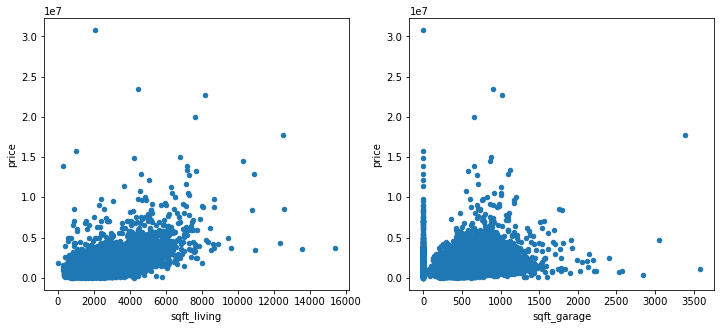

In [158]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='sqft_living', y='price', ax=ax1)
df1.plot.scatter(x='sqft_garage', y='price', ax=ax2)

In [159]:
upper_limit = df1['sqft_garage'].mean() + 3*df1['sqft_garage'].std()
lower_limit = df1['sqft_garage'].mean() - 3*df1['sqft_garage'].std()

df1['sqft_garage'] = np.where(df1['sqft_garage'] > upper_limit, upper_limit,
    np.where(df1['sqft_garage'] < lower_limit, lower_limit, df1['sqft_garage']))

In [160]:
upper_limit = df1['sqft_living'].mean() + 3*df1['sqft_living'].std()
lower_limit = df1['sqft_living'].mean() - 3*df1['sqft_living'].std()

df1['sqft_living'] = np.where(df1['sqft_living'] > upper_limit, upper_limit,
    np.where(df1['sqft_living'] < lower_limit, lower_limit, df1['sqft_living']))

<AxesSubplot:xlabel='sqft_garage', ylabel='Density'>

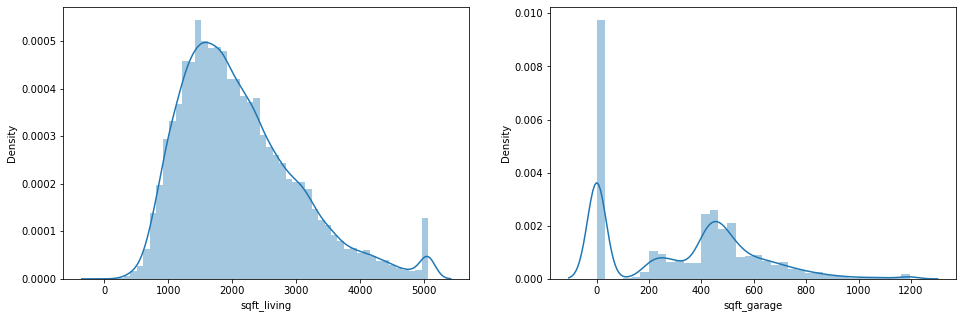

In [161]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['sqft_living'])
plt.subplot(1,2,2)
sns.distplot(df1['sqft_garage'])

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

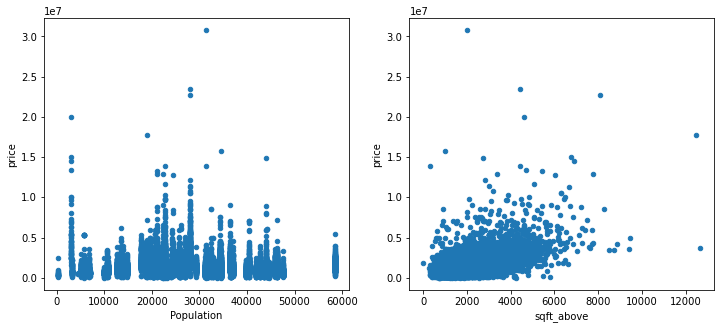

In [162]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='Population', y='price', ax=ax1)
df1.plot.scatter(x='sqft_above', y='price', ax=ax2)

In [ ]:
upper_limit = df1['Population'].mean() + 3*df1['Population'].std()
lower_limit = df1['Population'].mean() - 3*df1['Population'].std()

df1['Population'] = np.where(df1['Population'] > upper_limit, upper_limit,
    np.where(df1['Population'] < lower_limit, lower_limit, df1['Population']))

In [ ]:
upper_limit = df1['sqft_above'].mean() + 3*df1['sqft_above'].std()
lower_limit = df1['sqft_above'].mean() - 3*df1['sqft_above'].std()

df1['sqft_above'] = np.where(df1['sqft_above'] > upper_limit, upper_limit,
    np.where(df1['sqft_above'] < lower_limit, lower_limit, df1['sqft_above']))

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Population'])
plt.subplot(1,2,2)
sns.distplot(df1['sqft_above'])

In [ ]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df1.plot.scatter(x='sqft_basement', y='price', ax=ax1)
df1.plot.scatter(x='sqft_patio', y='price', ax=ax2)

In [ ]:
upper_limit = df1['sqft_basement'].mean() + 3*df1['sqft_basement'].std()
lower_limit = df1['sqft_basement'].mean() - 3*df1['sqft_basement'].std()

df1['sqft_basement'] = np.where(df1['sqft_basement'] > upper_limit, upper_limit,
    np.where(df1['sqft_basement'] < lower_limit, lower_limit, df1['sqft_basement']))

In [ ]:
upper_limit = df1['sqft_patio'].mean() + 3*df1['sqft_patio'].std()
lower_limit = df1['sqft_patio'].mean() - 3*df1['sqft_patio'].std()

df1['sqft_patio'] = np.where(df1['sqft_patio'] > upper_limit, upper_limit,
    np.where(df1['sqft_patio'] < lower_limit, lower_limit, df1['sqft_patio']))

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['sqft_patio'])
plt.subplot(1,2,2)
sns.distplot(df1['sqft_basement'])

Population looks like a discrete measure here.  We will go with sqft living as the most correlated to begin our greedy algorithm approach.

## Categorical Variables

In [ ]:
# cats2 = ['waterfront', 'view', 'grade', 'condition']
# fig, axes = plt.subplots(ncols=len(cats2), figsize=(12,5))
# for index, feature in enumerate(cats2):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=axes[index])


There is some real symetry in the grade category.  As the grade increases, it appears that the average price of homes increases as well.  Good views and waterfront properties also seem correlated positively with price, which is understandable.  

In [ ]:
# cats3 = ['nuisance', 'sewer_system', 'greenbelt']
# fig, axes = plt.subplots(ncols=len(cats3), figsize=(12,5))
# for index, feature in enumerate(cats3):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=axes[index])

Not much can be gleaned from these bar charts.  

In [ ]:
# plt.scatter(df1.sewer_system, df1.price)

In [ ]:
# plt.scatter(df1.greenbelt, df1.price)

In [ ]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='condition', y='price', ax=ax1)
# df1.sort_values(by='price', ascending=False).plot.scatter(x='view', y='price', ax=ax2)

In [ ]:
# fig, (ax) = plt.subplots (ncols=1, figsize = (15, 10))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='grade', y='price', ax=ax)

## Attempts at some partial models.  

In [ ]:
y = df1.price
# X_iter = df1[['sqft_living', 'waterfront', 'grade']]

In [ ]:
# X_iter = pd.get_dummies(X_iter, columns=['grade', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter)))
# mae

The explained variance is higher, but the MAE is worse than our baseline model.  This model is now off by about $359,121.21 for any given prediction.  We will need to adjust the model.  We will attempt some partial regressions below to see what stands out.   

## Partial regression of Grade, sqft_living, and waterfront

In [ ]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

## Model and partial of Sqft Living, Waterfront, and View

In [ ]:
# y = df1.price
# X_iter2 = df1[['sqft_living', 'waterfront', 'view']]

In [ ]:
# X_iter2 = pd.get_dummies(X_iter2, columns=['view', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter2))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter2)))
# mae

In [ ]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter2.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

While I feel strongly about sqft living, I am beginning to think view does not have much impact on price as we predicted.  Perhaps the relationship can be better explained by a term or some transformation.  

# Neighborhood

In [ ]:
# Neigh = ['Neighborhood']
# fig, ax = plt.subplots(ncols=len(Neigh), figsize=(12,5))
# for index, feature in enumerate(Neigh):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=ax)


In [ ]:
# y = df1.price
# X_iter_Neigh = df1[['Neighborhood', 'sqft_living', 'waterfront']]
# X_iter_Neigh = pd.get_dummies(X_iter_Neigh, columns=['Neighborhood', 'waterfront'], drop_first=True)

In [ ]:
# model = sm.OLS(y, sm.add_constant(X_iter_Neigh))
# results = model.fit()
# print(results.summary())

In [ ]:
# mae = mean_absolute_error(y, results.predict(sm.add_constant(X_iter_Neigh)))
# mae

Neighborhood really seems to explain a great deal about the variance in price, and it reduced our MAE down from our baseline.  Our predictions are now around $313,516.77 off by any given predictor.    

In [ ]:
# X_iter_Neigh

In [ ]:
# fig = plt.figure(figsize=(275,475))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter_Neigh.columns),
#     grid=(16,16),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [ ]:
# # running our model with dummified predictors
# X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
#                        'sewer_system_PUBLIC RESTRICTED', 'yr_built', 'sqft_above', 'bathrooms',
#                       'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
#                       'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
#                       'Neighborhood_Baring' ], axis=1)
# y=dum_df1.price

# model_1 = sm.OLS(y, sm.add_constant(X1))
# results1 = model_1.fit()
# results1.summary()

In [ ]:
# baseline_mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
# # baseline_mae

In [ ]:
# dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [ ]:
# dum_df1.columns

Drop columns not correlated.  per gp 9-19.  

In [ ]:
# plt.hist(df1.price)

In [ ]:
# sns.distplot(df1.price, bins=30, kde=True)

## Cleaning data

applying a function to remove outliers outside 3 standard deviations

## Bedrooms

In [ ]:
# here we remove outliers by adding them to the highest, most relevant category, thus preserving data.  
df1.bathrooms.value_counts()

In [ ]:
df1.describe()

In [ ]:
# df1.loc[(df1['bedrooms'] > 6) & (df1['bathrooms'] > 6)]

In [ ]:
df1.bathrooms.value_counts()

Anything with zero bathrooms is suspect. 

In [ ]:
# df1.loc[df1['bathrooms'] < 1] = 1
# df1.loc[df1['bathrooms'] > 6] = 6

In [ ]:
# def change_value(condition): 
#     new_living = df1.sqft_living = np.sum(df1.sqft_living, (df1.sqft_garage*.75))
#     new_garage = df1.sqft_garage = np.subtract(df1.sqft_garage, (df1.sqft_garage*.75))
#     if condition == df1.loc[df1['sqft_garage'] > ['sqft_living']]:
#         return new_living, new_garage

In [ ]:
# df1.sqft_garage.apply(change_value)

In [ ]:
# X_iter

In [ ]:
# iter_model = sm.OLS(y, sm.add_constant(X_iter))
# iter_results = iter_model.fit()
# print(iter_results.summary())

In [ ]:
# iter_mae = mean_absolute_error(y, iter_results.predict(sm.add_constant(X_iter)))
# iter_mae

Our iterated model explains about 53 percent of the variance in `price` using `sqft_living` and `Neighborhood`. There  Overall this model is statistically significant, explaining about 38 percent of the variance in price.

In [ ]:
# fig = plt.figure(figsize=(30,220))
# sm.graphics.plot_partregress_grid(
#     iter_results, 
#     exog_idx=list(X_iter.columns),
#     grid=(14,15),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [ ]:
sns.heatmap(X.corr())

ccpr function partial 

In [ ]:
# df1['Neighborhood'].value_counts()

In [ ]:
# sns.heatmap(X.corr())

In [ ]:
# df1.heat_source

### Model Iteration

In [ ]:
# Creating categorical variables
cats = df1[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Neighborhood', 'grade']]
cats1 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood', 'grade']]

In [ ]:
cat_cols = cats.columns
dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [ ]:
# running our model with dummified predictors
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard'], axis=1)
y=df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

### Utilizing categorical variables

Well, we have a much higher R-squared number after incorporating the dummified categorical predictors, as this model claims to explain 64 percent of the variance in `price`.   The constant is no longer statistically significant, so we need to adjust our figures to more accurately account for why that is happening.  We should next remove columns that are statistically significant.  

MAE dropped significantly.  

## Addressing Multicolinerity

In [ ]:
X1.corr()

In [ ]:
abs(X1.corr()) > .75

In [ ]:
X2 = X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
X2['pairs'] = list(zip(X2.level_0, X2.level_1))
X2.set_index(['pairs'], inplace=True)
X2.drop(columns=['level_1', 'level_0'], inplace = True)
X2.columns = ['cc']
X2.drop_duplicates(inplace=True)
X2[(X2.cc>.75) & (X2.cc<1)]

In [ ]:
X1.drop(columns=['yr_built'], inplace=True)

There are three sets of variables that are highly correlated: yr_old and yr_built, sqft_above
and sqft_living, and bathrooms with sqft_living

In [ ]:
# running our model with dummified predictors
y=dum_df1.price
model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()


In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

### Final Model

In [ ]:
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 'lat', 'long', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard', 'Neighborhood_Enumclaw', 'heat_source_Electricity/Solar'], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

In [ ]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

## TEST without cleaning after baseline

In [85]:
cats = df1[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Neighborhood', 'grade']]
cats1 = df1[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'Neighborhood', 'grade']]

In [86]:
cat_cols = cats.columns
dum_df1 = pd.get_dummies(data=df1, columns=cat_cols, drop_first=True)

In [163]:
X1=dum_df1.drop(labels=['selldate', 'price', 'Zipcode', 'address', 
                       'sewer_system_PUBLIC RESTRICTED',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                      'floors', 'Neighborhood_Skykomish', 'Neighborhood_Black Diamond',
                      'Neighborhood_Baring', 'grade_2 Substandard', 'Neighborhood_Enumclaw', 'heat_source_Electricity/Solar'], axis=1)
y=dum_df1.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     834.7
Date:                Sat, 24 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:05:02   Log-Likelihood:            -4.2590e+05
No. Observations:               29175   AIC:                         8.519e+05
Df Residuals:                   29109   BIC:                         8.525e+05
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.255e+08   7.74e+06    -16.224      0.000   -1.41e+08    -1.1e+08
bedrooms                        -3.803e+04   4524.756     -8.404      0.000   -4.69e+04   -2.92e+04
bathrooms                        6.428e+04   6389.420     10.060      0.000    5.18e+04    7.68e+04
sqft_living                        66.5237     14.514      4.583      0.000      38.075      94.972
sqft_lot                            0.4892      0.056      8.686      0.000       0.379       0.600
sqft_above                        254.4461     14.422     17.643      0.000     226.178     282.714
sqft_basement                     124.0680     11.112     11.166      0.000     102.289     145.847
sqft_garage                      -106.3984     15.584     -6.827      0.000    -136.944     -75.852
sqft_patio                         66.7510     14.526      4.595      0.000      38.279      95.223
yr_built                         -762.6501    602.321     -1.266      0.205   -1943.227     417.927
yr_renovated                       59.7285     19.083      3.130      0.002      22.325      97.132
lat                              1.195e+06   4.91e+04     24.351      0.000     1.1e+06    1.29e+06
long                            -5.812e+05   6.06e+04     -9.587      0.000      -7e+05   -4.62e+05
yr_old                            378.0578    607.391      0.622      0.534    -812.456    1568.572
Population                         -1.1604      0.377     -3.076      0.002      -1.900      -0.421
waterfront_YES                   7.579e+05   2.87e+04     26.388      0.000    7.02e+05    8.14e+05
greenbelt_YES                   -5.829e+04   2.01e+04     -2.903      0.004   -9.76e+04   -1.89e+04
nuisance_YES                    -3.422e+04   8479.426     -4.036      0.000   -5.08e+04   -1.76e+04
view_EXCELLENT                   6.442e+05   2.91e+04     22.154      0.000    5.87e+05    7.01e+05
view_FAIR                        1.101e+05   3.83e+04      2.875      0.004     3.5e+04    1.85e+05
view_GOOD                        5.331e+04   2.19e+04      2.435      0.015    1.04e+04    9.62e+04
view_NONE                       -9.016e+04   1.32e+04     -6.816      0.000   -1.16e+05   -6.42e+04
condition_Fair                  -1.234e+05   3.62e+04     -3.409      0.001   -1.94e+05   -5.24e+04
condition_Good                   4.223e+04   7948.020      5.313      0.000    2.66e+04    5.78e+04
condition_Poor                  -7.191e+04   7.02e+04     -1.024      0.306    -2.1e+05    6.57e+04
condition_Very Good              1.011e+05   1.12e+04      9.068      0.000    7.93e+04    1.23e+05
heat_source_Gas                  1.861e+04   7544.823      2.466      0.014    3820.287    3.34e+04
heat_source_Gas/Solar            1.632e+05   5.55e+04      2.941      0.003    5.44

In [164]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

266810.88743535284

# section_3

 [section_1](#section_1)


[section_2](#section_2)

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

In [ ]:
# # reading in the King County dataset to Pandas
# df = pd.read_csv('data/Regional_Geographies.csv')
# df.info()

In [ ]:
# df.drop(labels='OBJECTID', axis=1, inplace=True)

In [89]:
df_dem = pd.read_csv('data/Points_of_Interest.csv')
df_dem.head()

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE
0,-122.067101,47.465386,1,10000032,5733.0,66,Station 79,79,20505 SE 152nd St,98059.0
1,-122.313910,47.552302,2,905,490884.0,664,Cleveland STEM High School,Cleveland,5511 15th Ave S,98108.0
2,-122.195782,47.657500,3,6600168,35858.0,663,Northwest University,NW University,5520 108th Ave NE,98033.0
3,-122.264083,47.319432,4,7,33.0,660,Evergreen Heights Elementary School,Evergreen Heights,5602 S 316th St,98001.0
4,-122.261359,47.333845,5,6600283,692199.0,660,Meredith Hill Elementary School,Hill,5830 S 300th St,98001.0


In [90]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5637 entries, 0 to 5636
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           5637 non-null   float64
 1   Y           5637 non-null   float64
 2   OBJECTID    5637 non-null   int64  
 3   FEATURE_ID  5637 non-null   int64  
 4   ESITE       4569 non-null   float64
 5   CODE        5637 non-null   int64  
 6   NAME        5637 non-null   object 
 7   ABB_NAME    5637 non-null   object 
 8   ADDRESS     5635 non-null   object 
 9   ZIPCODE     5625 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 440.5+ KB


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   selldate       29200 non-null  datetime64[ns]
 1   price          29200 non-null  float64       
 2   bedrooms       29200 non-null  int64         
 3   bathrooms      29200 non-null  float64       
 4   sqft_living    29200 non-null  int64         
 5   sqft_lot       29200 non-null  int64         
 6   floors         29200 non-null  float64       
 7   waterfront     29200 non-null  object        
 8   greenbelt      29200 non-null  object        
 9   nuisance       29200 non-null  object        
 10  view           29200 non-null  object        
 11  condition      29200 non-null  object        
 12  grade          29200 non-null  object        
 13  heat_source    29200 non-null  object        
 14  sewer_system   29200 non-null  object        
 15  sqft_above     2920

In [92]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5637 entries, 0 to 5636
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           5637 non-null   float64
 1   Y           5637 non-null   float64
 2   OBJECTID    5637 non-null   int64  
 3   FEATURE_ID  5637 non-null   int64  
 4   ESITE       4569 non-null   float64
 5   CODE        5637 non-null   int64  
 6   NAME        5637 non-null   object 
 7   ABB_NAME    5637 non-null   object 
 8   ADDRESS     5635 non-null   object 
 9   ZIPCODE     5625 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 440.5+ KB


In [93]:
rename_zip = {'ZIPCODE':'Zipcode'}
df_dem.rename(columns=rename_zip, inplace=True)

In [94]:
rename_long = {'X': 'long'}
rename_lat = {'Y': 'lat'}

In [95]:
df_dem.rename(columns=rename_long, inplace=True)
df_dem.rename(columns=rename_lat, inplace=True)

In [96]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5637 entries, 0 to 5636
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   long        5637 non-null   float64
 1   lat         5637 non-null   float64
 2   OBJECTID    5637 non-null   int64  
 3   FEATURE_ID  5637 non-null   int64  
 4   ESITE       4569 non-null   float64
 5   CODE        5637 non-null   int64  
 6   NAME        5637 non-null   object 
 7   ABB_NAME    5637 non-null   object 
 8   ADDRESS     5635 non-null   object 
 9   Zipcode     5625 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 440.5+ KB


In [ ]:
df1 = df.merge(df_zip, how='left', on='Zipcode')

## terms and transformations

In [ ]:
df_dem.loc[df_dem['CODE'] == 330].value_counts()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scattergeo())
fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue"
)
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [165]:
import geopandas

ModuleNotFoundError: No module named 'geopandas'

## Conclusion